In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [53]:
# video used
# https://www.youtube.com/watch?v=VmbA0pi2cRQ&t=27s

In [45]:
data = pd.read_csv('nile.csv')

In [6]:
print(data)

    studytime    score
0           1   9.9974
1           2  10.5556
2           3   9.9014
3           4  11.4800
4           5  12.8460
..        ...      ...
95         96  50.3060
96         97  90.6516
97         98  80.3060
98         99  97.9230
99        100  79.4620

[100 rows x 2 columns]


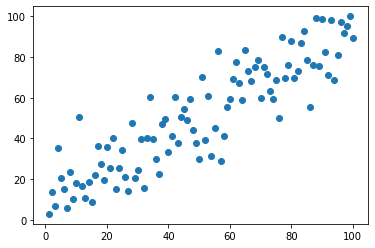

In [46]:
plt.scatter(data.studytime, data.score)
plt.show()

In [48]:
# def loss_function(m, b, points):
#     total_error = 0
#     for i in range(len(points)):
#         x = points.iloc[i].studytime
#         y = points.iloc[i].score
#         total_error += (y - (m * x + b)) **2
#     total_error / float(len(points))

Epoch: 0
Epoch: 50
Epoch: 100
Epoch: 150
Epoch: 200
Epoch: 250
0.95349606095784 1.005359263086146


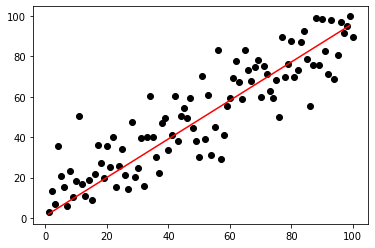

In [52]:
def gradient_descent(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient = 0
    
    n = len(points)
    
#     the for loop is the sum symbol
    for i in range(n):
#    we are putting the -2/n.... formula into python(after partially differentiating)
        x = points.iloc[i].studytime
        y = points.iloc[i].score
        
        m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
        b_gradient += -(2/n) * (y - (m_now * x * b_now))
        
#     go to the opposite direction
    m = m_now - m_gradient * L
    b = b_now - b_gradient * L
    return m, b

m = 0
b = 0
L = 0.0001
# iterations
epochs = 300

# to get a better and better m and b 
for i in range(epochs):
    if i % 50 == 0:
        print(f"Epoch: {i}")
    m, b = gradient_descent(m, b, data, L)
    
print(m, b)

plt.scatter(data.studytime, data.score, color="black")
plt.plot(list(range(1,100)), [m * x + b for x in range(1, 100)], color = "red" )
plt.show()